In [1]:
from py_eddy_tracker.dataset.grid import RegularGridDataset
from datetime import datetime

#Read in example SSH data that has been mapped onto a 0.25deg regular grid.
# /work/mh0287/m300466/topaz/ngc2013/zos
# /work/mh0287/m300466/topaz/rthk001/zos

expid='ngc2013'
varname='zos'
fq='dm'
outdir='/work/mh0287/m300466/topaz/'+expid+'/'+varname+'/'+fq+'/'
date = datetime(2020, 1, 21)
#figdate=date.strftime('%Y%m%d')
grid_name, lon_name, lat_name = (
    outdir+expid+'_'+varname+'_'+fq+'_'+date.strftime('%Y%m%d')+'_MR25.nc',
    "lon",
    "lat",
)
g = RegularGridDataset(grid_name, lon_name, lat_name) #assumes no time index, might only take the first time index
# g = RegularGridDataset(grid_name, lon_name, lat_name,indexs={'time':np.arange(5)})
# g = RegularGridDataset(grid_name, lon_name, lat_name,indexs={'time':10})

We assume pixel position of grid is centered for /work/mh0287/m300466/topaz/ngc2013/zos/dm/ngc2013_zos_dm_20200121_MR25.nc


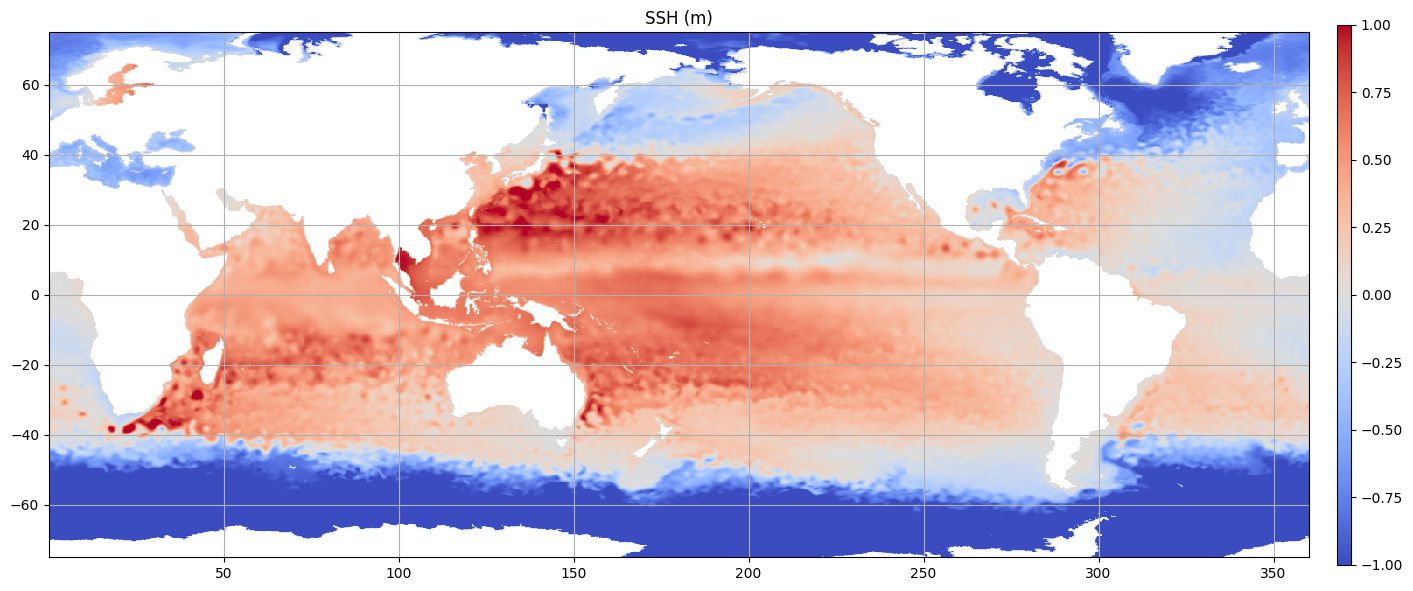

In [2]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(14, 12))
ax = fig.add_axes([0.02, 0.51, 0.9, 0.45])
ax.set_title("SSH (m)")
ax.set_ylim(-75, 75)
ax.set_aspect("equal")
m = g.display(ax, name="zos", vmin=-1, vmax=1)
ax.grid(True)
plt.colorbar(m, cax=fig.add_axes([0.94, 0.51, 0.01, 0.45]))
# plt.show()

In [3]:
# https://py-eddy-tracker.readthedocs.io/en/latest/python_module/02_eddy_identification/pet_filter_and_detection.html#sphx-glr-python-module-02-eddy-identification-pet-filter-and-detection-py
#from datetime import datetime

from matplotlib import pyplot as plt
from numpy import arange

from py_eddy_tracker import data
from py_eddy_tracker.dataset.grid import RegularGridDataset

# from py_eddy_tracker import start_logger
# start_logger().setLevel("DEBUG")  # Available options: ERROR, WARNING, INFO, DEBUG

        
##Load Input grid, SSH is used to detect eddies. Add a new filed to store the high-pass filtered SSHA
# g = RegularGridDataset(grid_name, lon_name, lat_name)
g.add_uv("zos")
g.copy("zos", "zos_high")
wavelength = 700  #choice of spatial cutoff for high pass filter in km
g.bessel_high_filter("zos", wavelength, order=1)



No filtering above 85.000000 degrees of latitude


In [4]:
# Run the detection for the total grid and the filtered grid
step_ht=0.005 #intervals to search for closed contours (5mm in this case)
a_filtered, c_filtered = g.eddy_identification(
    "zos_high", "u", "v",
    date,  # Date of identification
    step_ht,  # step between two isolines of detection (m)
    pixel_limit=(50, 400),  # Min and max pixel count for valid contour
    shape_error=30,  # Error max (%) between ratio of circle fit and contour
)
# # Shape error gallery: how to choose your shape error. [https://py-eddy-tracker.readthedocs.io/en/latest/python_module/02_eddy_identification/pet_shape_gallery.html#sphx-glr-python-module-02-eddy-identification-pet-shape-gallery-py]
# merge_f = a_filtered.merge(c_filtered)

# a_tot, c_tot = g.eddy_identification(
#     "zos", "u", "v",
#     date,  # Date of identification
#     step_ht,  # step between two isolines of detection (m)
#     pixel_limit=(50, 200),  # Min and max pixel count for valid contour
#     shape_error=30,  # Error max (%) between ratio of circle fit and contour
# )
# merge_t = a_tot.merge(c_tot)

/work/mh0256/m300466/miniconda3/envs/t2/lib/python3.10/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [5]:
def start_axes(title):
    fig = plt.figure(figsize=(13, 5))
    ax = fig.add_axes([0.03, 0.03, 0.90, 0.94])
    ax.set_xlim(0,360), ax.set_ylim(-75,75)
    ax.set_aspect("equal")
    ax.set_title(title, weight="bold")
    return ax


def update_axes(ax, mappable=None):
    ax.grid()
    if mappable:
        plt.colorbar(mappable, cax=ax.figure.add_axes([0.94, 0.05, 0.01, 0.9]))


/work/mh0256/m300466/miniconda3/envs/t2/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


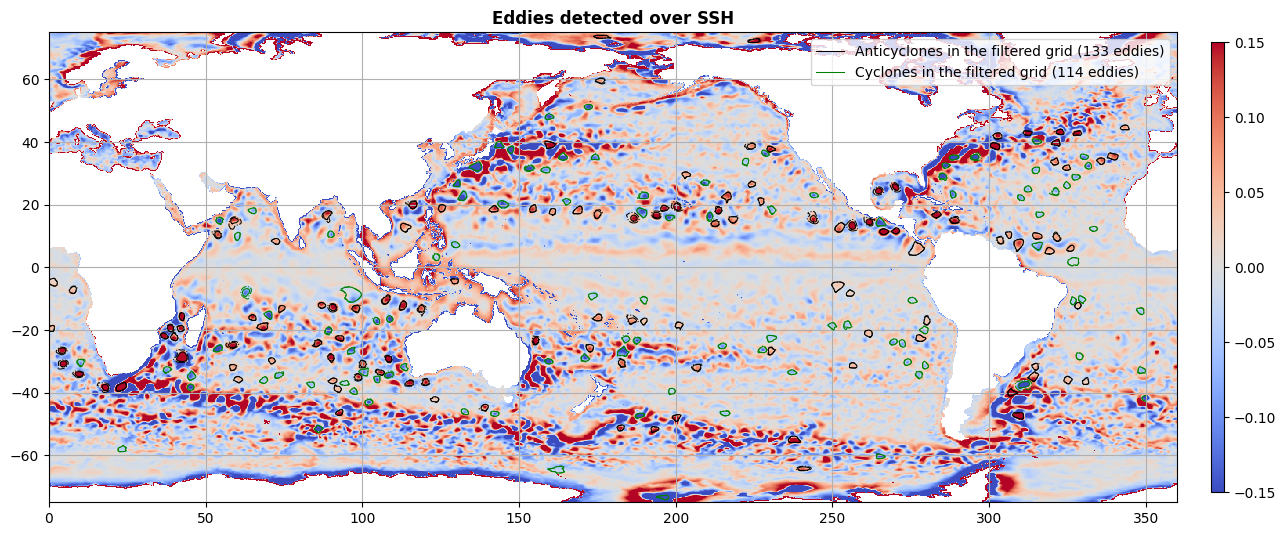

In [6]:
ax = start_axes("Eddies detected over SSH")
m = g.display(ax, "zos", vmin=-0.15, vmax=0.15)
a_filtered.display(
    ax,
    lw=0.75,
    label="Anticyclones in the filtered grid ({nb_obs} eddies)",
    ref=-10,
    color="k",
)
c_filtered.display(
    ax, lw=0.75, label="Cyclones in the filtered grid ({nb_obs} eddies)", 
    ref=-10, 
    color="green"
)
ax.legend()
update_axes(ax, m)

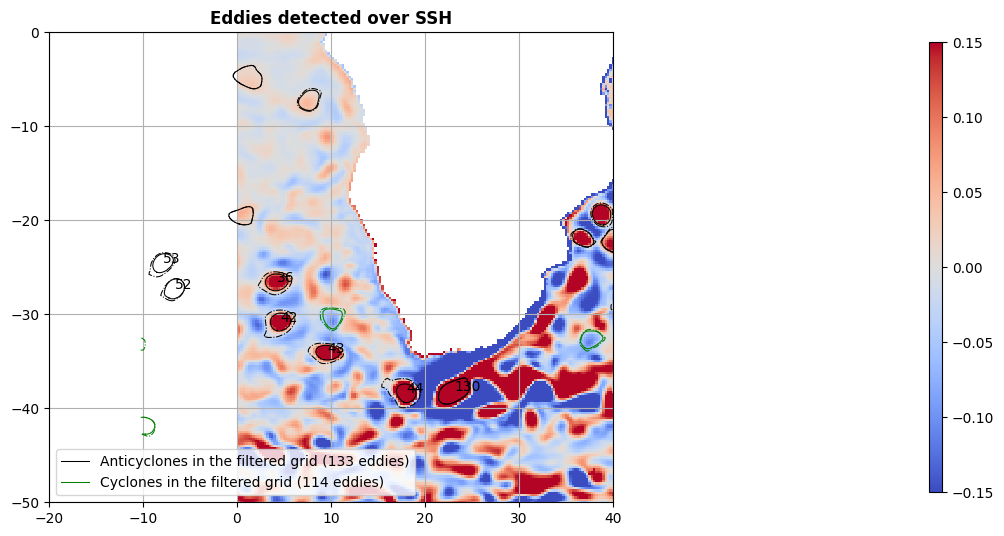

In [7]:
a=a_filtered
c=c_filtered

#Identify anticyclones in Agulhas leakage region and their respective IDs. 
def start_axes(title):
    fig = plt.figure(figsize=(13, 5))
    ax = fig.add_axes([0.03, 0.03, 0.90, 0.94])
    ax.set_xlim(-20,40), ax.set_ylim(-50,0)
    ax.set_aspect("equal")
    ax.set_title(title, weight="bold")
    return ax


def update_axes(ax, mappable=None):
    ax.grid()
    if mappable:
        plt.colorbar(mappable, cax=ax.figure.add_axes([0.94, 0.05, 0.01, 0.9]))

ax = start_axes("Eddies detected over SSH")
m = g.display(ax, "zos", vmin=-0.15, vmax=0.15)
a.display(
    ax,
    lw=0.75,
    label="Anticyclones in the filtered grid ({nb_obs} eddies)",
    ref=-10,
    color="k",
)
c.display(
    ax, lw=0.75, label="Cyclones in the filtered grid ({nb_obs} eddies)", 
    ref=-10, 
    color="green"
)
ax.legend()
update_axes(ax, m)

#Get eddy ID# for region around Agulhas leakage
import numpy as np
ARidx = np.argwhere(((a.lat<=-20) & (a.lat>=-45) & (a.lon>350)) | ((a.lat<=-20) & (a.lat>=-45) & (a.lon<30)) ) 

for ii in range(len(ARidx)):
    if a.longitude[ARidx][ii]>180:
        # ax.text(a.longitude[ARidx][ii][0]-360,a.latitude[ARidx][ii][0],str(a_filtered.num_point_e[ARidx][ii][0]))
        ax.text(a.longitude[ARidx][ii][0]-360,a.latitude[ARidx][ii][0],str(ARidx[ii][0]))
    else:
        ax.text(a.longitude[ARidx][ii][0],a.latitude[ARidx][ii][0],str(ARidx[ii][0]))





In [10]:
#Save output
from netCDF4 import Dataset

with Dataset(date.strftime(outdir+expid+"_anticyclonic_"+date.strftime('%Y%m%d')+".nc"), "w") as h:
    a_filtered.to_netcdf(h)
with Dataset(date.strftime(outdir+expid+"_cyclonic_"+date.strftime('%Y%m%d')+".nc"), "w") as h:
    c_filtered.to_netcdf(h)